## Assignment 8
submitted by: Gaurav Bhardwaj

## To study the relationship between energy used by people in NYC and Greenhouse Gas emission

In [1]:
## Importing all the required packages
import pandas as pd
import numpy as np
import pylab as pl
from __future__ import print_function
import operator
import requests
from IPython.display import HTML
import warnings
import geopandas as gpd
from fiona.crs import from_epsg
import os
import statsmodels.formula.api as smf
from scipy import stats as st

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [118]:
## Reading the excel file downloaded from 'http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml'
df = pd.read_excel(os.getenv("PUIDATA")+'/nyc_benchmarking_disclosure_data_reported_in_2016.xlsx')

In [120]:
## Converting the file to csv and storing it in PUIdata
df = df.to_csv(os.getenv("PUIDATA")+'/nyc_benchmarking_disclosure_data_reported_in_2016.csv')

In [121]:
df = pd.read_csv(os.getenv("PUIDATA")+'/nyc_benchmarking_disclosure_data_reported_in_2016.csv')
del df['Unnamed: 0']
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,350.0,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


In [122]:
small_df = pd.DataFrame()

In [123]:
small_df = df.drop(['Order',
       'Co-reported BBL Status', 'BBLs Co-reported', 'Property Name',
       'DOF Benchmarking Submission Status',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)',
       'District Hot Water Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Release Date', 'DEP Provided Water Use (kgal)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method'],axis=1)

In [124]:
small_df.head()

,Record Number,"NYC Borough, Block and Lot (BBL)",Reported NYC Building Identification Numbers (BINs),Parent Property Id,Parent Property Name,Street Number,Street Name,Zip Code,Borough,Primary Property Type - Self Selected,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²)
0,4113711.0,1.003360e+09,1088884,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,BIALYSTOKER PLACE,10002.0,Manhattan,Multifamily Housing,73.7,436.3,98052.0
1,4630135.0,1.010618e+09,1026728,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,WEST 52 STREET,10019.0,Manhattan,Multifamily Housing,51.3,201.4,58851.0
2,4626594.0,1.014270e+09,1043974,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,2 AVENUE,10021.0,Manhattan,Multifamily Housing,44.9,538.4,166432.0
3,4626608.0,1.015180e+09,1048117,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,LEXINGTON AVENUE,10128.0,Manhattan,Multifamily Housing,91.3,699.3,114939.0
4,5048763.0,1.003920e+09,1079685,Not Applicable: Standalone Property,Not Applicable: Standalone Property,350.0,EAST 10 STREET,10009.0,Manhattan,Residence Hall/Dormitory,NaN,0.0,93420.0


In [125]:
## Taking log of energy use and GHG as values are large
small_df['log_eui'] = np.log10(df['Site EUI (kBtu/ft²)'].astype(float))
small_df['log_ghg'] = np.log10(df['Total GHG Emissions (Metric Tons CO2e)'].astype(float))

small_df = small_df.dropna(subset=['log_eui'])
small_df = small_df.dropna(subset=['log_ghg'])

## Removing outliers
small_df = small_df[small_df.log_eui>0]
small_df = small_df[small_df.log_eui<100]
small_df = small_df[small_df.log_ghg>0]
small_df = small_df[small_df.log_ghg<100]

In [126]:
## Running univariate regression over the two varibales
lm = smf.ols(formula= 'log_ghg ~ log_eui', data=small_df).fit()

In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_ghg   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:40:20   Log-Likelihood:                -3886.7
No. Observations:               11409   AIC:                             7777.
Df Residuals:                   11407   BIC:                             7792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9042      0.018     49.720      0.000         0.869     0.940
log_eui        0.9917      0.009    105.353      0.000         0.973     1.010
==============================================================================
Omnibus:                     2210.741   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13308.439
Skew:                           0.795   Prob(JB):                         0.00
Kurtosis:                       8.046   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Relationship between Energy Use and GHG Emission')

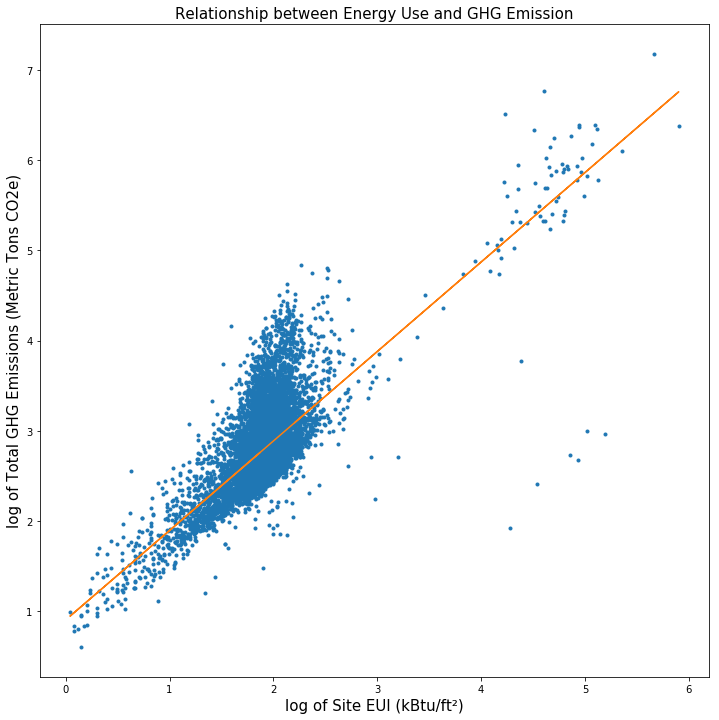

In [67]:
## Visualizng the analysis done above
pl.figure(figsize=(12,12))
pl.plot(small_df.log_eui, small_df.log_ghg,'.')
pl.plot(small_df.log_eui, lm.predict())
pl.xlabel('log of Site EUI (kBtu/ft²)',fontsize=15)
pl.ylabel('log of Total GHG Emissions (Metric Tons CO2e)',fontsize=15)
pl.title('Relationship between Energy Use and GHG Emission',fontsize=15)

Fig 1. This figure gives the relationship between energy use (kBtu/ft²) and greenhouse gas emission (Metric Tons CO2e). We can see that there is positive linear correlation between the the two variables. 

In [68]:
## Reading shapefile of NYC zip code based for visualization
nyc = gpd.read_file(os.getenv("PUIDATA")+'/ZIP_CODE_040114.shp')

In [70]:
nyc['Zip Code']=nyc.ZIPCODE.astype(int)

In [71]:
mapData = pd.merge(nyc,small_df, left_on=nyc['Zip Code'], right_on=small_df['Zip Code'])

In [73]:
mapDmapData.crs = from_epsg(4326)
mapData['geometry'] = nyc.to_crs(epsg=2263).geometryata.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,Street Number,Street Name,Zip Code_y,Borough,Primary Property Type - Self Selected,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),log_eui,log_ghg
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,NaN,135 AVENUE,11436.0,Queens,Hotel,86.6,1422.1,233210.0,1.937518,3.152930
1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,NaN,140 STREET,11436.0,Queens,Hotel,128.2,1701.6,199873.0,2.107888,3.230857
2,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,NaN,NORTH CONDUIT AVENUE,11436.0,Queens,Hotel,147.8,592.2,73476.0,2.169674,2.772468
3,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,NaN,135 AVENUE,11436.0,Queens,Hotel,136.9,1901.1,206936.0,2.136403,3.279005
4,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,NaN,135 AVENUE,11436.0,Queens,Hotel,85.6,710.6,114800.0,1.932474,2.851625


In [74]:
mapData.crs = from_epsg(4326)
mapData['geometry'] = nyc.to_crs(epsg=2263).geometry

In [75]:
mapData = gpd.GeoDataFrame(mapData)

In [128]:
mapData.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'Zip Code_x', 'Record Number',
       'NYC Borough, Block and Lot (BBL)',
       'Reported NYC Building Identification Numbers (BINs)',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code_y', 'Borough',
       'Primary Property Type - Self Selected', 'Site EUI (kBtu/ft²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'DOF Property Floor Area (ft²)', 'log_eui', 'log_ghg'],
      dtype='object')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


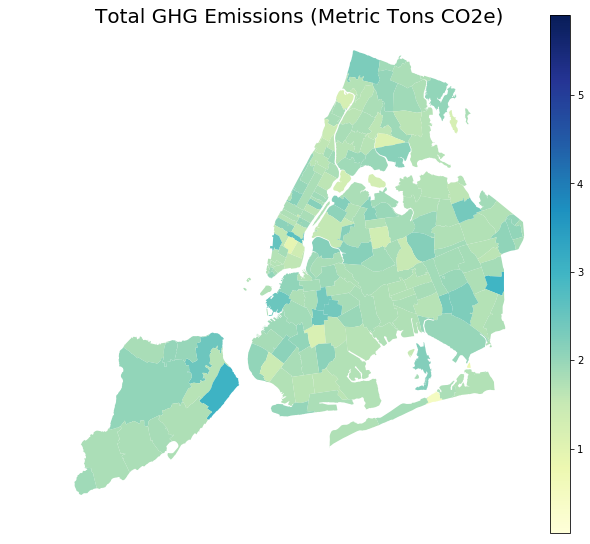

In [129]:
ax= mapData.plot(figsize=(9,9),column='log_ghg',colormap='YlGnBu')
vmin,vmax = min(mapData.log_eui.values), max(mapData.log_eui.values)
ax.axis('off')
ax.set_title('Total GHG Emissions (Metric Tons CO2e)',size=20)
fig = ax.get_figure()
cax = fig.add_axes([0.9,0.1,0.03,0.8])

sm= pl.cm.ScalarMappable(cmap='YlGnBu',norm=pl.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
fig.colorbar(sm, cax=cax)

#labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, 
#                                                 df_["Number of homicides by firearm"].values)]
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.display()

labels = ['{0}, {1}'.format(c, n) for c,n in zip(mapData["ZIPCODE"].values, 
                                                mapData['log_ghg'].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)

Fig 2. This figure gives the pattern of Green House Gas Emissions (Metric Tons CO2e) aggregated by zip code\
and the color bar gives the intensity of emissions

In [130]:
import mpld3

ImportError: No module named 'mpld3'